In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Integration

In [ ]:
from scipy import integrate

## Q1: integrating a sampled vs. analytic function

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Create a function to integrate, and use NumPy to sample it at $N$ points.  Compare the answer you get from integrating the function directly (using `integrate.quad` to the integral of the sampled function (using `integrate.simps`).

To get a better sense of the accuracy, vary $N$, and look at how the error changes (if you plot the error vs. $N$, you can measure the _convergence_).

# Interpolation

In [ ]:
from scipy import interpolate

## Q2: interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function.  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  Also, try using cubic splines (look at `CubicSpline`)

Try plotting the resulting interpolant.

## ODEs

## Q3: damped driven pendulum and chaos

There are a large class of ODE integration methods available through the `scipy.integrate.ode()` function.  Not all of them provide _dense output_ -- most will just give you the value at the end of the integration.  

The explicit `dopri5` integrator will store the solution at intermediate points and allow you to access them.  We'll use that here.  You'll need to use the `set_solout()` method to define a function that takes the current integration solution and store it).

The damped driven pendulum obeys the following equations:
$$\dot{\theta} = \omega$$
$$\dot{\omega} = -q \omega - \sin \theta + b \cos \omega_d t$$
here, $\theta$ is the angle of the pendulum from vertical and $\omega$ is the angular velocity.  $q$ is a damping coefficient, $b$ is a forcing amplitude, and $\omega_d$ is a driving frequency.

Choose $q = 0.5$ and $\omega_d = 2/3$.

Integrate the system for different values of $b$ (start with $b = 0.9$ and increase by $0.05$, and plot the results ($\theta$ vs. $t$).  Here's a RHS function to get you started:

In [10]:
def rhs(t, Y, q, omega_d, b):
        """ damped driven pendulum system derivatives.  Here, Y = (theta, omega) are
        the solution variables. """
        f = np.zeros_like(Y)
        
        f[0] = Y[1]
        f[1] = -q*Y[1] - np.sin(Y[0]) + b*np.cos(omega_d*t)

        return f

Note that the pendulum can flip over, giving values of $\theta$ outside of $[-\pi, \pi]$.  The following function can be used to restrict it back to $[-\pi, \pi]$ for plotting.

In [34]:
def restrict_theta(theta):
    """ convert theta to be restricted to lie between -pi and pi"""
    tnew = theta + np.pi
    tnew += -2.0*np.pi*np.floor(tnew/(2.0*np.pi))
    tnew -= np.pi
    return tnew

Write a function that takes an initial angle, $\theta_0$, and integrates the system and returns the solution.  For the parameters that are part of the `rhs()` function, you'll need to use the `set_f_params()` method.  

Some values of $b$ will show very non-periodic behavior.  To see chaos, integrate two different pendula that are the same except for $\theta_0$, with only a small difference between then (like 60 degrees and 60.0001 degrees.  You'll see the solutions track for a while, but then diverge.

In [47]:
from scipy.integrate import ode

def int_pendulum(theta0, q, omega_d, b, tend):
    r = ode(rhs)
    r.set_integrator("dopri5", nsteps=150000)

    sol = []
    r.set_solout(lambda t, y: sol.append([t, *y]))

    t0 = 0.0
    omega0 = 0.0
    r.set_initial_value((theta0, omega0), t0)

    r.set_f_params(q, omega_d, b)

    r.integrate(tend)
    return np.array(sol)

In [43]:
s = int_pendulum(np.radians(60), 0.5, 0.6666, 1.5, 200.0)

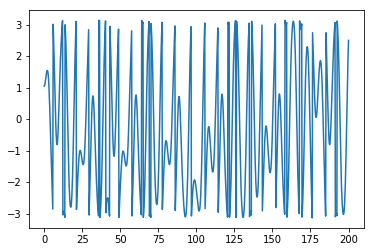

In [44]:
plt.plot(s[:,0], restrict_theta(s[:,1]))

In [45]:
q = int_pendulum(np.radians(60.001), 0.5, 0.6666, 1.5, 200.0)

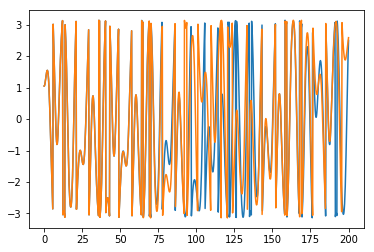

In [46]:
plt.plot(s[:,0], restrict_theta(s[:,1]))
plt.plot(q[:,0], restrict_theta(q[:,1]))